In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
edu_raw = pd.read_csv("./Raw_data/education_districtwise.csv")

edu_raw.head(10)

DISTNAME STATNAME  BLOCKS  VILLAGES  CLUSTERS  TOTPOPULAT  OVERALL_LI
0   DISTRICT32   STATE1      13       391       104    875564.0       66.92
1  DISTRICT649   STATE1      18       678       144   1015503.0       66.93
2  DISTRICT229   STATE1       8        94        65   1269751.0       71.21
3  DISTRICT259   STATE1      13       523       104    735753.0       57.98
4  DISTRICT486   STATE1       8       359        64    570060.0       65.00
5  DISTRICT323   STATE1      12       523        96   1070144.0       64.32
6  DISTRICT114   STATE1       6       110        49    147104.0       80.48
7  DISTRICT438   STATE1       7       134        54    143388.0       74.49
8  DISTRICT610   STATE1      10       388        80    409576.0       65.97
9  DISTRICT476   STATE1      11       361        86    555357.0       69.90

In [3]:
edu_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DISTNAME    680 non-null    object 
 1   STATNAME    680 non-null    object 
 2   BLOCKS      680 non-null    int64  
 3   VILLAGES    680 non-null    int64  
 4   CLUSTERS    680 non-null    int64  
 5   TOTPOPULAT  634 non-null    float64
 6   OVERALL_LI  634 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 37.3+ KB


In [8]:
#Count NA values

edu_raw.isna().sum()

DISTNAME       0
STATNAME       0
BLOCKS         0
VILLAGES       0
CLUSTERS       0
TOTPOPULAT    46
OVERALL_LI    46
dtype: int64

In [ ]:
na_values = edu_raw.isna()
#It checks the entire DataFrame edu_raw for missing values (NaN) and returns a boolean DataFrame of the same shape.


# Here I will check row by row, if any of the value for that row has a true value, 
na_rows = na_values.any(axis=1)
# axis=1 → checks row-wise.
# any() → returns True if at least one cell in that row is NaN.

edu_raw_na = edu_raw[na_rows]
# Uses boolean indexing to filter rows where na_rows is True, 
# returns only the rows that contain at least one NaN value.


edu_raw_na

DISTNAME STATNAME  BLOCKS  VILLAGES  CLUSTERS  TOTPOPULAT  OVERALL_LI
54   DISTRICT302  STATE26       5       510        61         NaN         NaN
55   DISTRICT276  STATE26       6       393        59         NaN         NaN
200  DISTRICT588  STATE21      10       951        71         NaN         NaN
205  DISTRICT535  STATE21      13      1050        99         NaN         NaN
206  DISTRICT218  STATE21       8       341        47         NaN         NaN
207  DISTRICT258  STATE21       6       342        53         NaN         NaN
266  DISTRICT303   STATE3       4        62         5         NaN         NaN
267  DISTRICT608   STATE3       3       160        13         NaN         NaN
268   DISTRICT62   STATE3       4       145         7         NaN         NaN
269  DISTRICT474   STATE3       4        91        11         NaN         NaN
302  DISTRICT467  STATE14       9       159        40         NaN         NaN
303  DISTRICT449  STATE14       8        95        33         NaN         NaN
304  DISTRICT464  STATE14       9       162        46         NaN         NaN
305   DISTRICT38  STATE14       6        82        33         NaN         NaN
313  DISTRICT192   STATE4       2       503        36         NaN         NaN
314  DISTRICT164   STATE4       2       179        29         NaN         NaN
315  DISTRICT112   STATE4       2       297        38         NaN         NaN
316  DISTRICT426   STATE4       2       430        37         NaN         NaN
364  DISTRICT165  STATE34       7       776       107         NaN         NaN
389  DISTRICT378  STATE24      15      1187       157         NaN         NaN
390  DISTRICT591  STATE24       8       385        60         NaN         NaN
391  DISTRICT171  STATE24      14       996       149         NaN         NaN
435  DISTRICT376  STATE31       5       632       103         NaN         NaN
436  DISTRICT212  STATE31       2       244        30         NaN         NaN
437  DISTRICT439  STATE31       3       628        56         NaN         NaN
438  DISTRICT419  STATE31       4       512        61         NaN         NaN
439  DISTRICT445  STATE31       3       524        56         NaN         NaN
440  DISTRICT166  STATE31       5       771        93         NaN         NaN
441  DISTRICT317  STATE31       4       719        70         NaN         NaN
442   DISTRICT14  STATE31       6      1051       118         NaN         NaN
443  DISTRICT331  STATE31       5       786        85         NaN         NaN
444   DISTRICT59  STATE31       6       700       114         NaN         NaN
445  DISTRICT548  STATE31       6       688       111         NaN         NaN
496  DISTRICT233  STATE22       4       505        32         NaN         NaN
523  DISTRICT153   STATE9       6       629       161         NaN         NaN
524  DISTRICT179   STATE9       4       195        40         NaN         NaN
525  DISTRICT530   STATE9       4       269        83         NaN         NaN
526  DISTRICT139   STATE9       6       360        85         NaN         NaN
527  DISTRICT106   STATE9       6       648       135         NaN         NaN
528   DISTRICT89   STATE9       6       929       116         NaN         NaN
529  DISTRICT137   STATE9       5       402        82         NaN         NaN
568  DISTRICT506  STATE17       8      1006       151         NaN         NaN
601  DISTRICT105  STATE20       5       584        96         NaN         NaN
611  DISTRICT236  STATE20       8       687       164         NaN         NaN
612  DISTRICT383  STATE20       4       832       102         NaN         NaN
615  DISTRICT606  STATE20       6       782        96         NaN         NaN

In [15]:
edu_raw_na.shape

(46, 7)

In [ ]:
# Now remove the rows with (NaN) from the dataset
edu_data = edu_raw.dropna()

<Axes: >

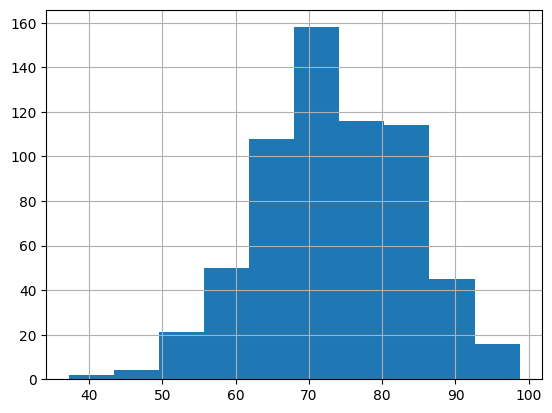

In [18]:
edu_data["OVERALL_LI"].hist()

(array([  0.,   0.,   0.,   1.,   6.,  49., 173., 225., 159.,  21.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

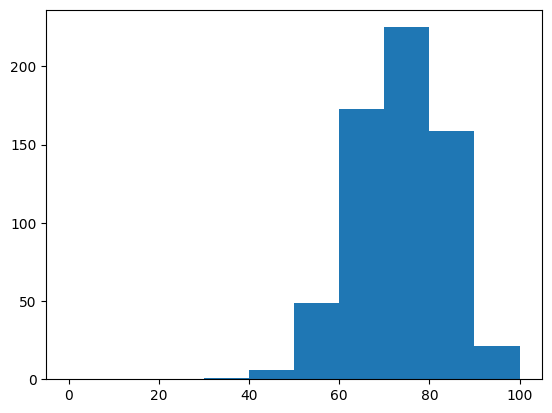

In [20]:
plt.hist(
    data = edu_data,
    x="OVERALL_LI",
    bins = range(0,101,10)
)

In [ ]:
# Mean of the Overall_li column
overall_li_avg = edu_data["OVERALL_LI"].mean()
print(f"Mean: {overall_li_avg:.4f}")

Mean: 73.3952


In [26]:
# Standard deviation of the column

overall_li_std = edu_data["OVERALL_LI"].std()
print(f"Standard deviation: {overall_li_std:.3f}")

Standard deviation: 10.098


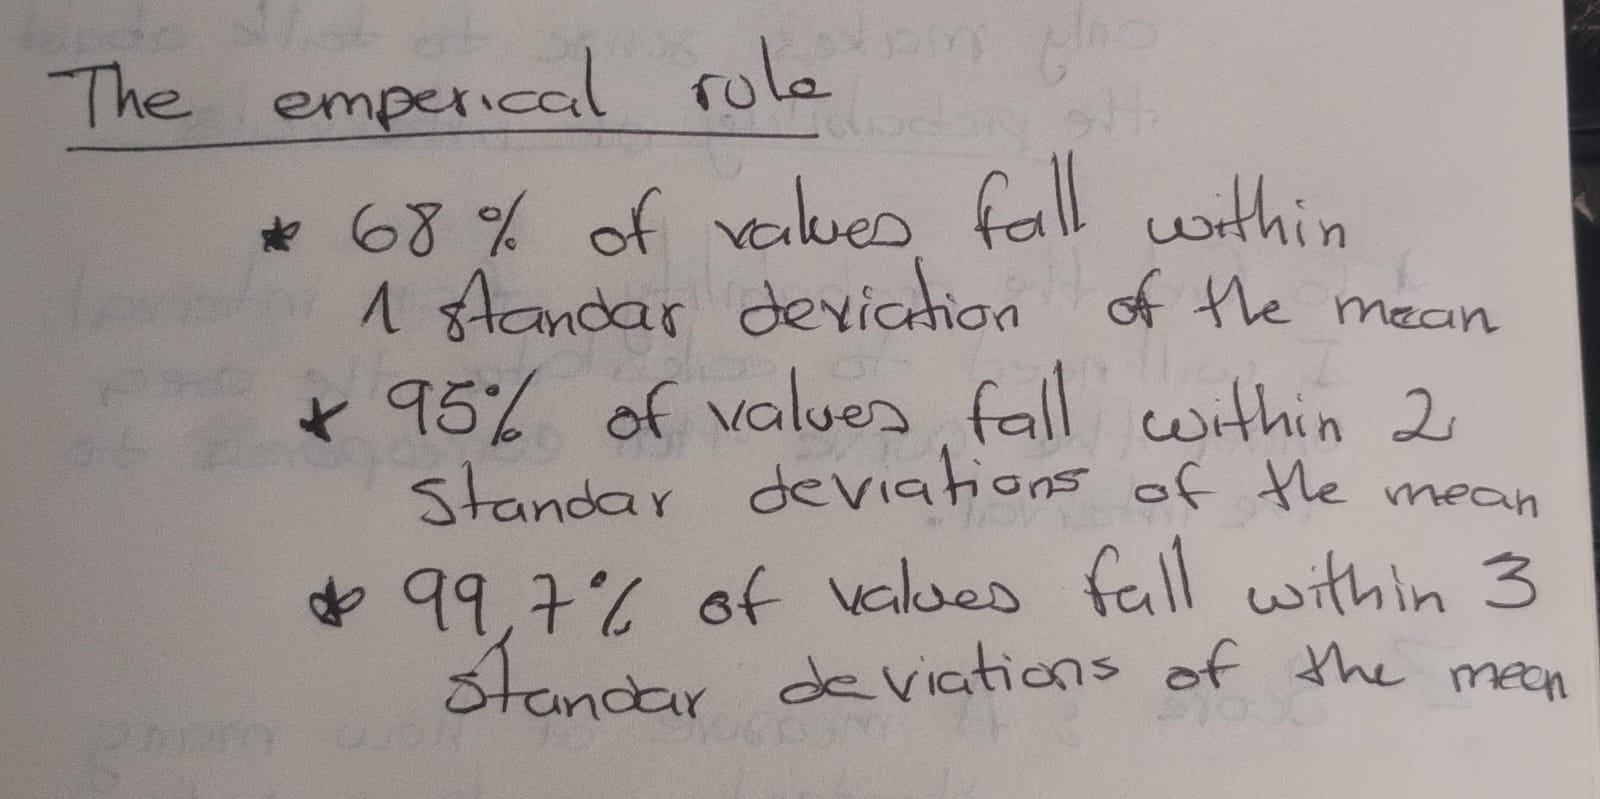

In [ ]:
# Knwo that the standard deviation is known,
# Will check the Emperical rule which says that
# 68% of the data will be 1 std away from the mean
# 95% of the data will be 2 std away from the mean
# 99.7% of the data will be 3 std away from the mean

edu_data_std1_lower = overall_li_avg - (1*overall_li_std)
edu_data_std1_upper = overall_li_avg + (1*overall_li_std)

(edu_data["OVERALL_LI"] >= edu_data_std1_lower) # Bolean check over the conditional statement. 

0       True
1       True
2       True
3      False
4       True
       ...  
675     True
676    False
677     True
678     True
679     True
Name: OVERALL_LI, Length: 634, dtype: bool

In [ ]:
# to check the percentage of values falling into the first std range

std1_data = ((edu_data["OVERALL_LI"] >= edu_data_std1_lower) & (edu_data["OVERALL_LI"] < edu_data_std1_upper)).mean()
print(f"Percentage of the dataset falling 1 std away of the mean => {std1_data*100:.2f}")

Percentage of the dataset falling 1 std away of the mean 66.40


In [35]:
# Check percentage of the data in the 2 std range

edu_data_std2_upper = overall_li_avg + (2*overall_li_std)
edu_data_std2_lower = overall_li_avg - (2*overall_li_std)

std2_data = ((edu_data["OVERALL_LI"] >= edu_data_std2_lower)&(edu_data["OVERALL_LI"] < edu_data_std2_upper)).mean()
print(f"Percentage of the dataset falling 2 std away of the mean => {std2_data*100:.2f}")

Percentage of the dataset falling 2 std away of the mean => 95.43


In [36]:
# Check percentage of the data in the 3 std range

edu_data_std3_lower = overall_li_avg - (3*overall_li_std)
edu_data_std3_upper = overall_li_avg + (3*overall_li_std)

std3_data = ((edu_data["OVERALL_LI"] >= edu_data_std3_lower) & (edu_data["OVERALL_LI"] < edu_data_std3_upper)).mean()
print(f"Percentage of the dataset falling 3 std away of the mean => {std3_data*100:.2f}")


Percentage of the dataset falling 3 std away of the mean => 99.68


## Z-Score

A measure of how many standard deviations below or above of the population mean a data point is.

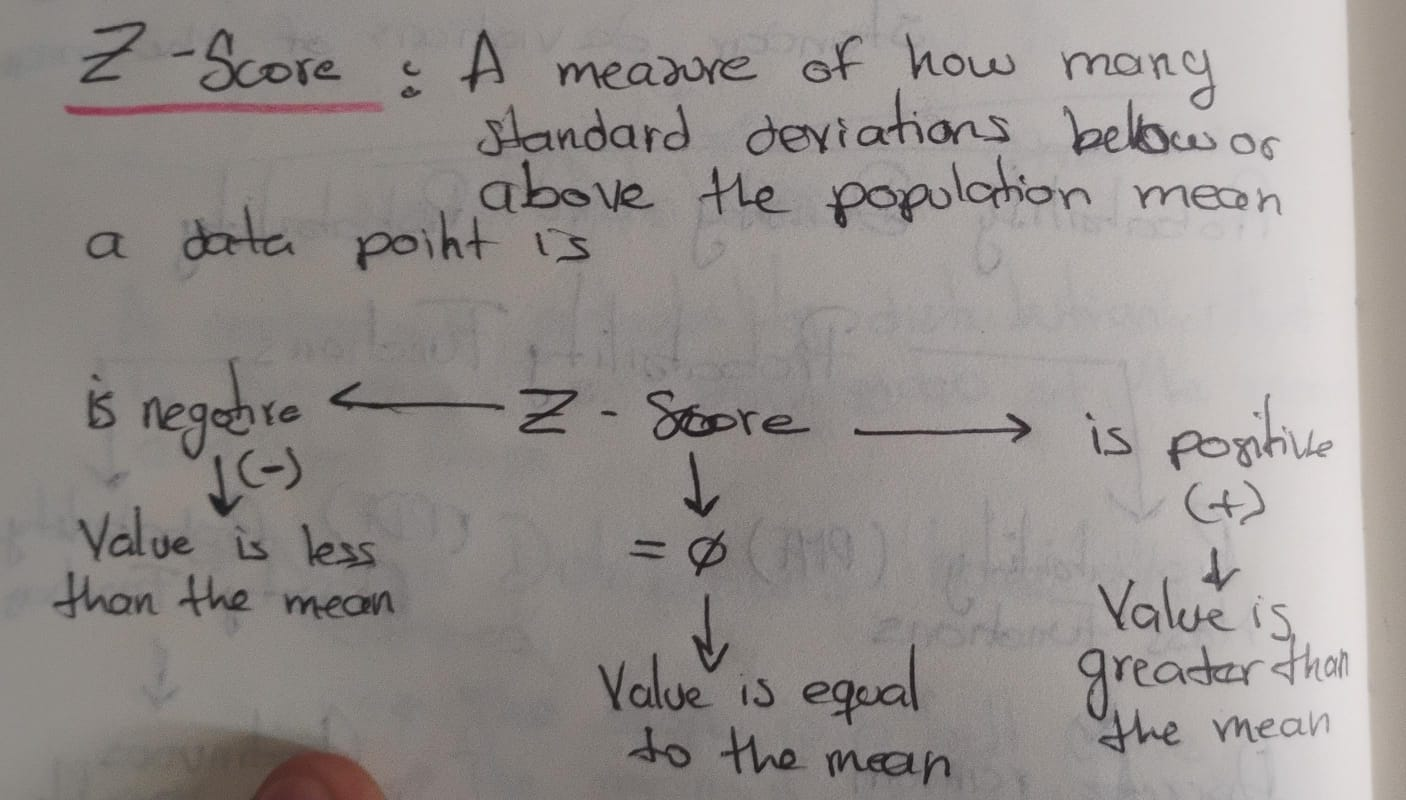

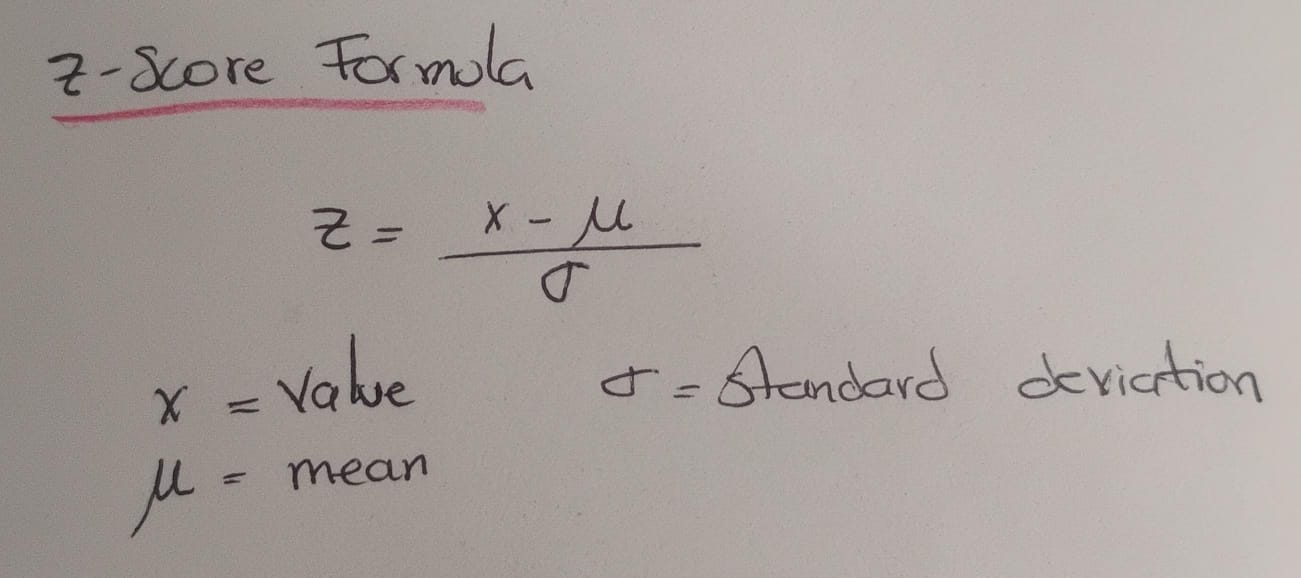

In [38]:
# to add the column of the z-score

edu_data["z-score"] = stats.zscore(edu_data["OVERALL_LI"])
edu_data.head(15)

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_13044\3583035501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data["z-score"] = stats.zscore(edu_data["OVERALL_LI"])


DISTNAME STATNAME  BLOCKS  VILLAGES  CLUSTERS  TOTPOPULAT  OVERALL_LI  \
0    DISTRICT32   STATE1      13       391       104    875564.0       66.92   
1   DISTRICT649   STATE1      18       678       144   1015503.0       66.93   
2   DISTRICT229   STATE1       8        94        65   1269751.0       71.21   
3   DISTRICT259   STATE1      13       523       104    735753.0       57.98   
4   DISTRICT486   STATE1       8       359        64    570060.0       65.00   
5   DISTRICT323   STATE1      12       523        96   1070144.0       64.32   
6   DISTRICT114   STATE1       6       110        49    147104.0       80.48   
7   DISTRICT438   STATE1       7       134        54    143388.0       74.49   
8   DISTRICT610   STATE1      10       388        80    409576.0       65.97   
9   DISTRICT476   STATE1      11       361        86    555357.0       69.90   
10  DISTRICT412   STATE1      11       187        95    476820.0       68.69   
11   DISTRICT81   STATE1      15       390       120    619266.0       68.54   
12  DISTRICT293   STATE1      14       861       124   1526406.0       83.98   
13  DISTRICT563   STATE1      12       495        98    615711.0       73.50   
14  DISTRICT312   STATE1       4       253        32    265960.0       62.49   

     z-score  
0  -0.641712  
1  -0.640721  
2  -0.216559  
3  -1.527694  
4  -0.831990  
5  -0.899380  
6   0.702127  
7   0.108499  
8  -0.735860  
9  -0.346384  
10 -0.466299  
11 -0.481165  
12  1.048988  
13  0.010387  
14 -1.080739

In [39]:
edu_data.tail(15)

DISTNAME STATNAME  BLOCKS  VILLAGES  CLUSTERS  TOTPOPULAT  OVERALL_LI  \
665   DISTRICT79  STATE32       1         6         1     41934.0       98.35   
666  DISTRICT617  STATE32       1        38         8    200314.0       87.83   
667  DISTRICT123  STATE11       3        80        16    237586.0       88.49   
668  DISTRICT147  STATE11       3        42         8     36819.0       77.50   
669  DISTRICT206  STATE11       3        76        13    105539.0       84.25   
670  DISTRICT371  STATE29      52      1555       233   2737738.0       61.55   
671  DISTRICT620  STATE29      36       822       129   2552073.0       62.25   
672  DISTRICT477  STATE29      57      1045       203   3811738.0       64.87   
673  DISTRICT599  STATE29      46      1214       184   3031877.0       62.53   
674  DISTRICT136  STATE29      16        71        48   4010238.0       80.96   
675  DISTRICT522  STATE29      37       876       137   5296396.0       78.05   
676  DISTRICT498  STATE29      64      1458       230   4042191.0       56.06   
677  DISTRICT343  STATE29      59      1117       216   3483648.0       65.05   
678  DISTRICT130  STATE29      51       993       211   3522644.0       66.16   
679  DISTRICT341  STATE29      41       783       185   2798214.0       65.46   

      z-score  
665  2.473101  
666  1.430536  
667  1.495944  
668  0.406800  
669  1.075746  
670 -1.173896  
671 -1.104524  
672 -0.844873  
673 -1.076775  
674  0.749697  
675  0.461307  
676 -1.717972  
677 -0.827035  
678 -0.717030  
679 -0.786403